<a target="_blank" href="https://colab.research.google.com/drive/1CVAkogTmMPhA_a7I4p8Oy9LRKEQq1jIT#scrollTo=jPHVGzEsIkpd">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

**Dataset Used**


In [ ]:
!pip install umap-learn

**Dataset Used:**

Course Enrollments Dataset: https://www.kaggle.com/datasets/ddatad/course-enrollments-dataset/

In [ ]:
import zipfile
import os

# File path for the uploaded ZIP file
zip_file_path = '/content/drive/MyDrive/Datasets/student course.zip'

# Extracting the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Define the extraction path
    extraction_path = '/mnt/data/course_enrollments_dataset'
    zip_ref.extractall(extraction_path)

# Listing the contents of the extracted folder
extracted_files = os.listdir(extraction_path)
extracted_files


['user_embeddings.csv', 'rating_df.csv', 'course_embeddings.csv']

In [ ]:
import pandas as pd

# Load the datasets
course_embeddings_df = pd.read_csv(f"{extraction_path}/course_embeddings.csv")
rating_df = pd.read_csv(f"{extraction_path}/rating_df.csv")
user_embeddings_df = pd.read_csv(f"{extraction_path}/user_embeddings.csv")

# Display the first few rows of each dataframe for a preliminary inspection
course_embeddings_head = course_embeddings_df.head()
rating_df_head = rating_df.head()
user_embeddings_head = user_embeddings_df.head()

(course_embeddings_head, rating_df_head, user_embeddings_head)

(         item  CFeature0  CFeature1  CFeature2  CFeature3  CFeature4  \
 0    CC0101EN   0.009657  -0.005238  -0.004098   0.016303  -0.005274   
 1    CL0101EN  -0.008611   0.028041   0.021899  -0.001465   0.006900   
 2  ML0120ENv3   0.027439  -0.027649  -0.007484  -0.059451   0.003972   
 3    BD0211EN   0.020163  -0.011972  -0.003714  -0.015548  -0.007540   
 4    DS0101EN   0.006399   0.000492   0.005640   0.009639  -0.005487   
 
    CFeature5  CFeature6  CFeature7  CFeature8  CFeature9  CFeature10  \
 0  -0.000361  -0.015081  -0.012229   0.015686   0.008401   -0.035495   
 1  -0.017981   0.010899  -0.037610  -0.019397  -0.025682   -0.000620   
 2   0.020496  -0.012695   0.036138   0.019965   0.018686   -0.010450   
 3   0.014847  -0.005700  -0.006068  -0.005792  -0.023036    0.015999   
 4  -0.000590  -0.010015  -0.001514  -0.017598   0.003590    0.016799   
 
    CFeature11  CFeature12  CFeature13  CFeature14  CFeature15  
 0    0.009381   -0.032560   -0.007292    0.000966   -0

In [ ]:
# Detailed Data Analysis
# Analyzing the structure, missing values, data types, and unique counts of each dataset

def analyze_dataset(df):
    analysis = pd.DataFrame()
    analysis['Column'] = df.columns
    analysis['Data Type'] = [df[col].dtype for col in df.columns]
    analysis['Non-Null Count'] = df.count()
    analysis['Null Count'] = df.isnull().sum()
    analysis['Unique Count'] = df.nunique()
    analysis['First Value'] = [df[col].iloc[0] for col in df.columns]
    return analysis

# Analyzing each dataset
course_embeddings_analysis = analyze_dataset(course_embeddings_df)
rating_df_analysis = analyze_dataset(rating_df)
user_embeddings_analysis = analyze_dataset(user_embeddings_df)

(course_embeddings_analysis, rating_df_analysis, user_embeddings_analysis)

(        Column Data Type  Non-Null Count  Null Count  Unique Count First Value
 0         item    object             NaN         NaN           NaN    CC0101EN
 1    CFeature0   float64             NaN         NaN           NaN    0.009657
 2    CFeature1   float64             NaN         NaN           NaN   -0.005238
 3    CFeature2   float64             NaN         NaN           NaN   -0.004098
 4    CFeature3   float64             NaN         NaN           NaN    0.016303
 5    CFeature4   float64             NaN         NaN           NaN   -0.005274
 6    CFeature5   float64             NaN         NaN           NaN   -0.000361
 7    CFeature6   float64             NaN         NaN           NaN   -0.015081
 8    CFeature7   float64             NaN         NaN           NaN   -0.012229
 9    CFeature8   float64             NaN         NaN           NaN    0.015686
 10   CFeature9   float64             NaN         NaN           NaN    0.008401
 11  CFeature10   float64             Na

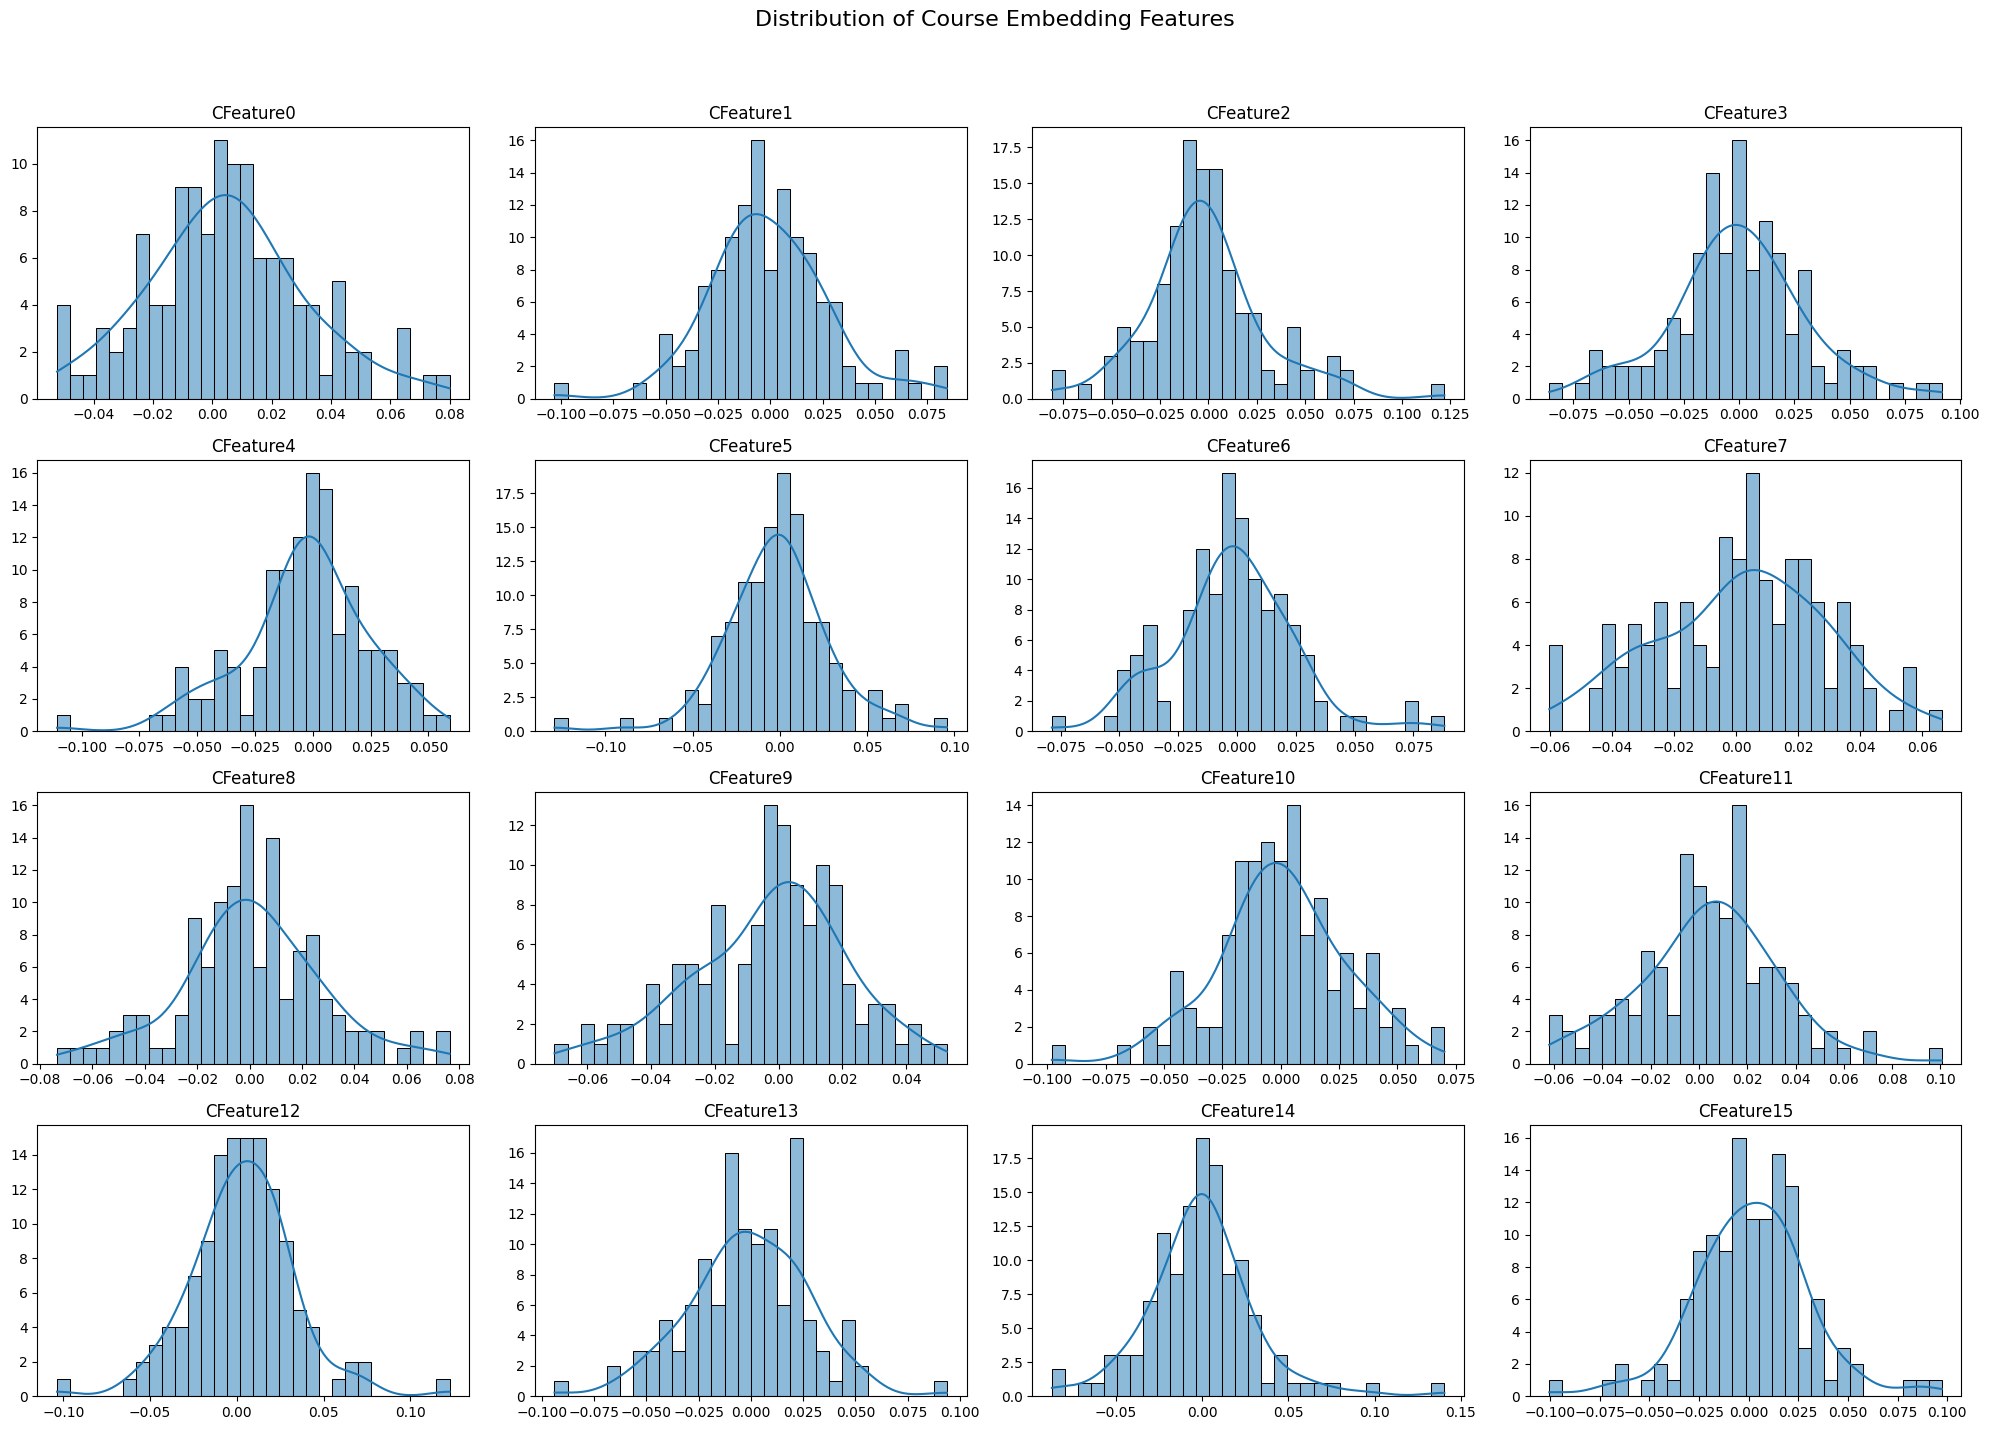

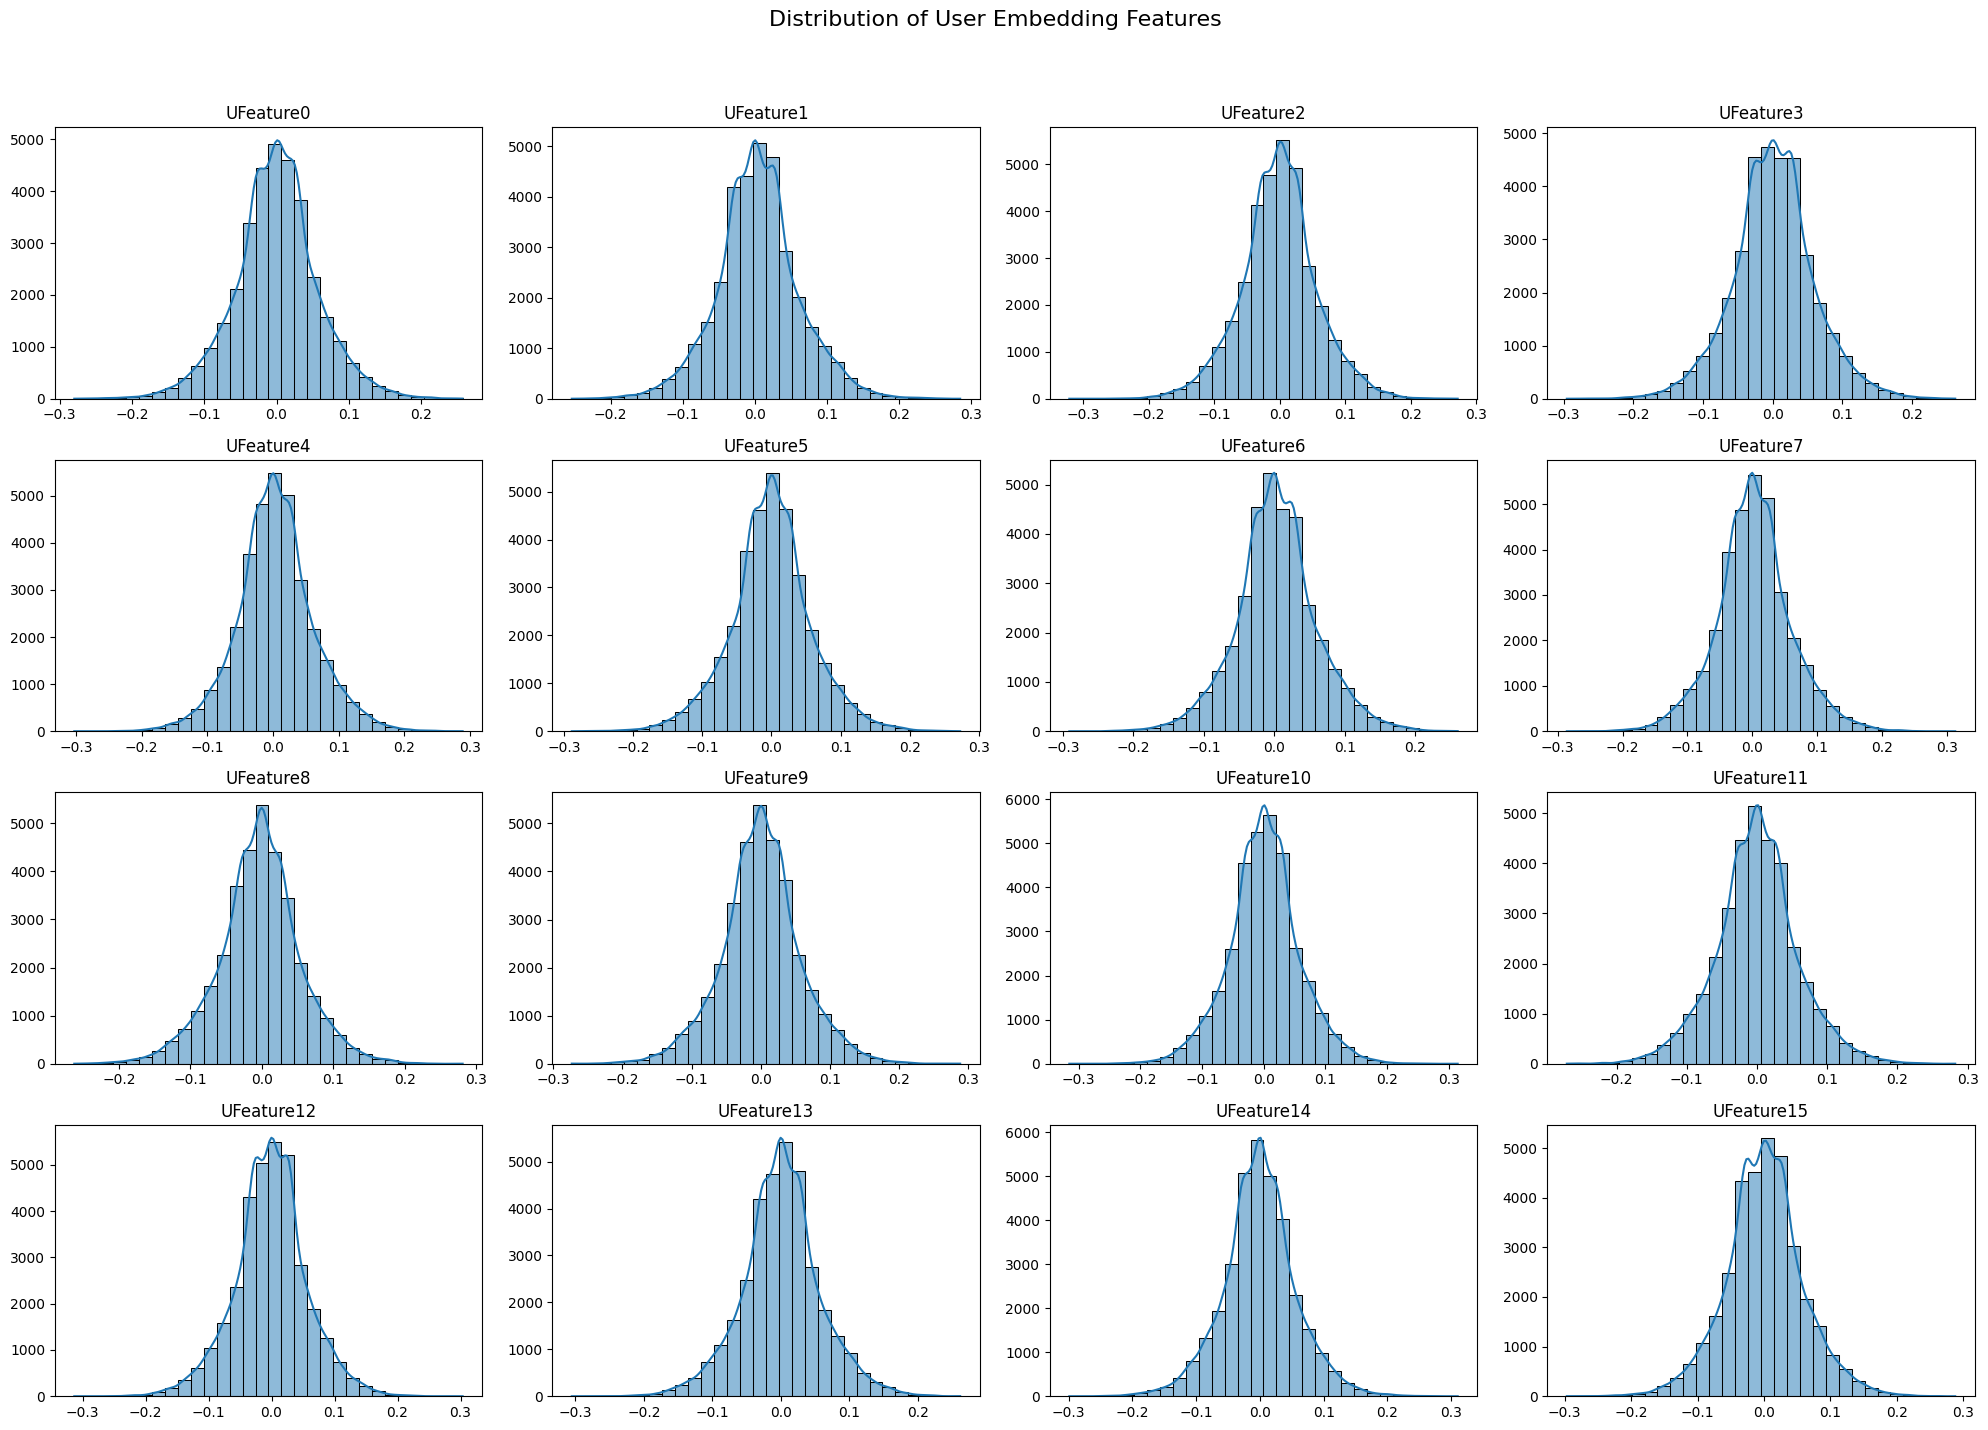

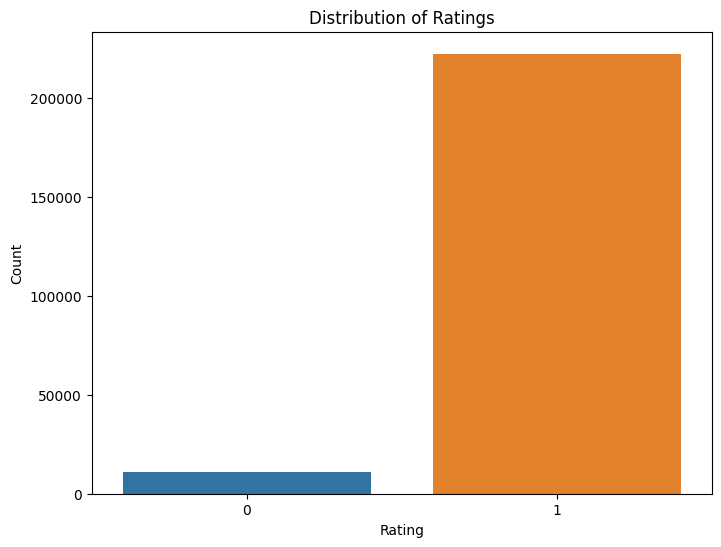

(<Figure size 2000x1500 with 16 Axes>,
 <Figure size 2000x1500 with 16 Axes>,
 None)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to plot histograms for dataframe columns
def plot_histograms(df, title):
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
    fig.suptitle(title, fontsize=16)
    axes = axes.flatten()
    for i, col in enumerate(df.columns[1:]):  # Skipping the first column (identifier)
        sns.histplot(df[col], ax=axes[i], bins=30, kde=True)
        axes[i].set_title(col, fontsize=12)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    return fig

# Plotting histograms for course embeddings
course_embeddings_hist = plot_histograms(course_embeddings_df, "Distribution of Course Embedding Features")

# Plotting histograms for user embeddings
user_embeddings_hist = plot_histograms(user_embeddings_df, "Distribution of User Embedding Features")

# Plotting distribution of ratings
plt.figure(figsize=(8, 6))
rating_dist_plot = sns.countplot(x='rating', data=rating_df)
rating_dist_plot.set_title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

course_embeddings_hist, user_embeddings_hist, plt.show()  # Displaying the plots


**1. PCA**

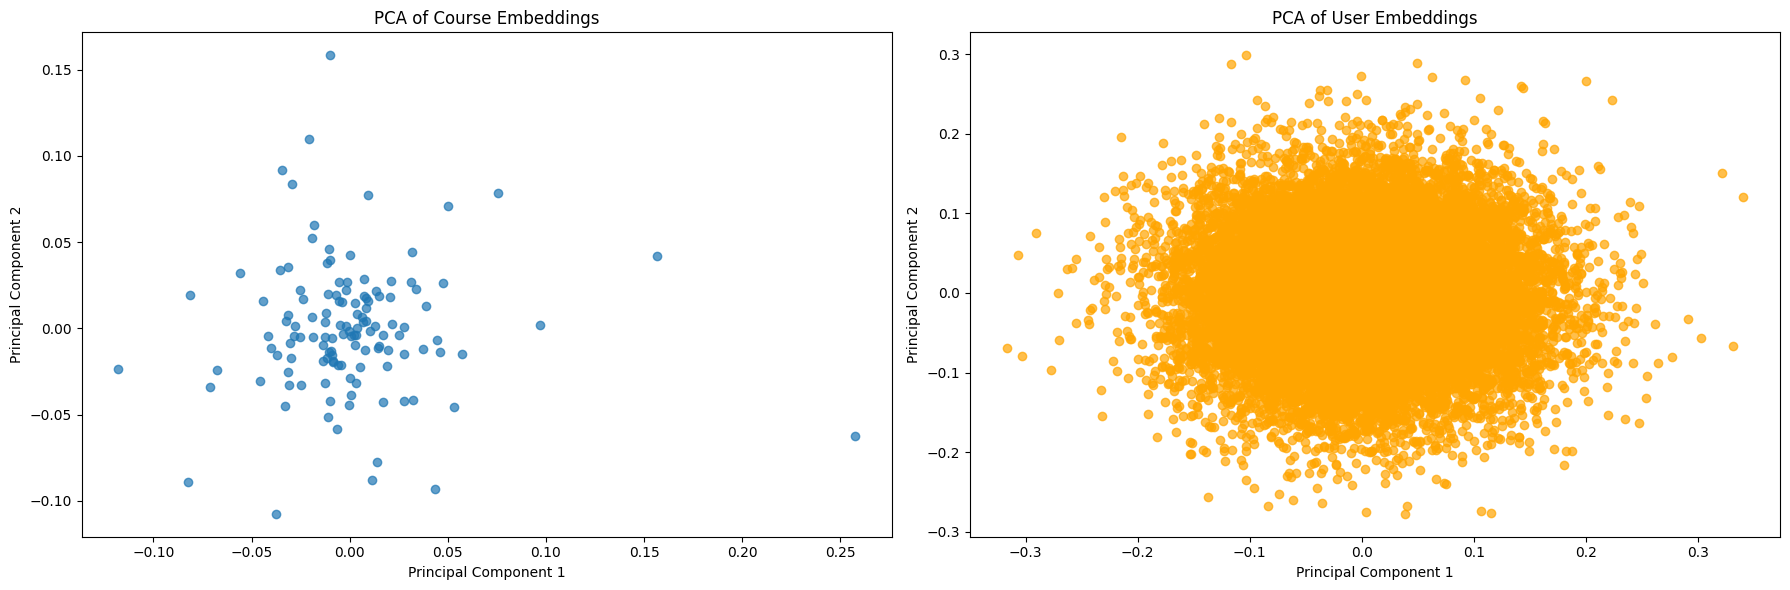

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)

# Separating features from identifiers
course_features = course_embeddings_df.drop('item', axis=1)
user_features = user_embeddings_df.drop('user', axis=1)

# Fitting PCA on course and user features
course_pca = pca.fit_transform(course_features)
user_pca = pca.fit_transform(user_features)

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plotting course embeddings in 2D
ax[0].scatter(course_pca[:, 0], course_pca[:, 1], alpha=0.7)
ax[0].set_title('PCA of Course Embeddings')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

# Plotting user embeddings in 2D
ax[1].scatter(user_pca[:, 0], user_pca[:, 1], alpha=0.7, color='orange')
ax[1].set_title('PCA of User Embeddings')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

**2. TSNE**

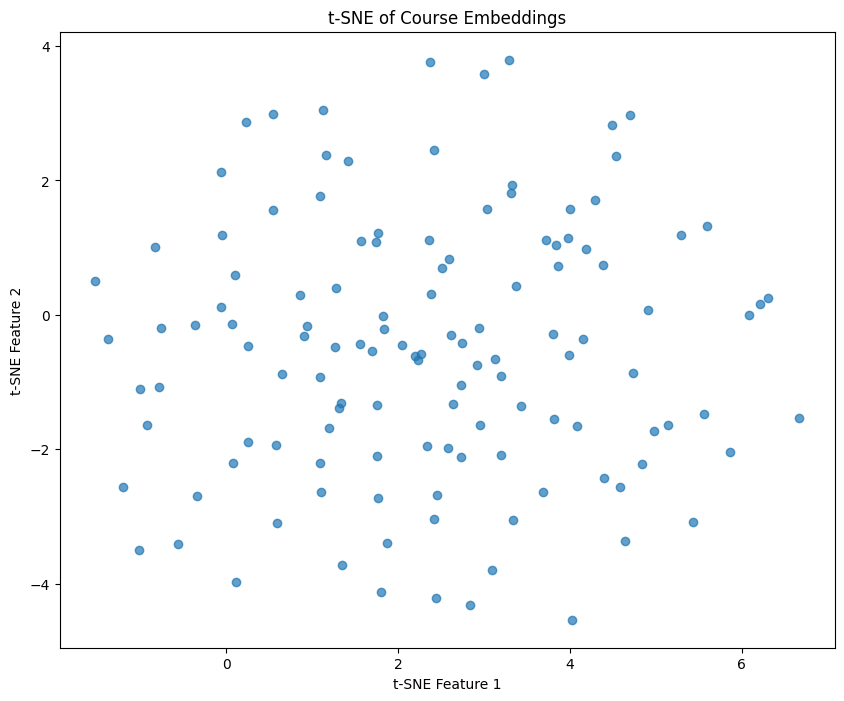

In [ ]:
from sklearn.manifold import TSNE

# Applying t-SNE to the course embeddings
tsne = TSNE(n_components=2, random_state=42)
course_tsne = tsne.fit_transform(course_features)

# Plotting the results of t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(course_tsne[:, 0], course_tsne[:, 1], alpha=0.7)
plt.title('t-SNE of Course Embeddings')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

**3. UMAP**

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


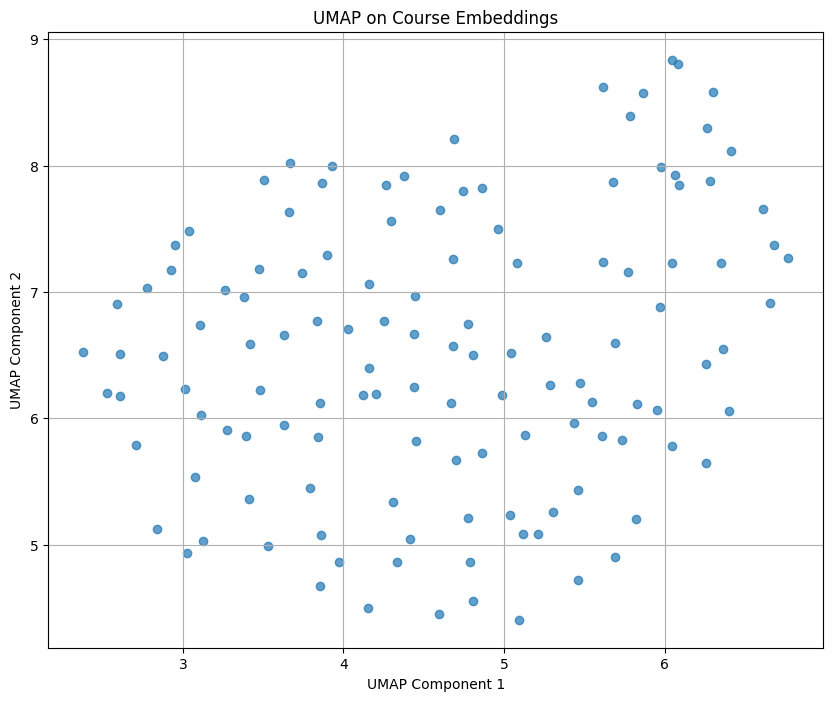

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import umap

# Applying UMAP on Course Embeddings
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Excluding the 'item' column which is not a feature
course_embeddings_umap = umap_model.fit_transform(course_embeddings_df.iloc[:, 1:])

# Visualizing the results of UMAP
plt.figure(figsize=(10, 8))
plt.scatter(course_embeddings_umap[:, 0], course_embeddings_umap[:, 1], alpha=0.7)
plt.title('UMAP on Course Embeddings')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)
plt.show()

**4. SVD**

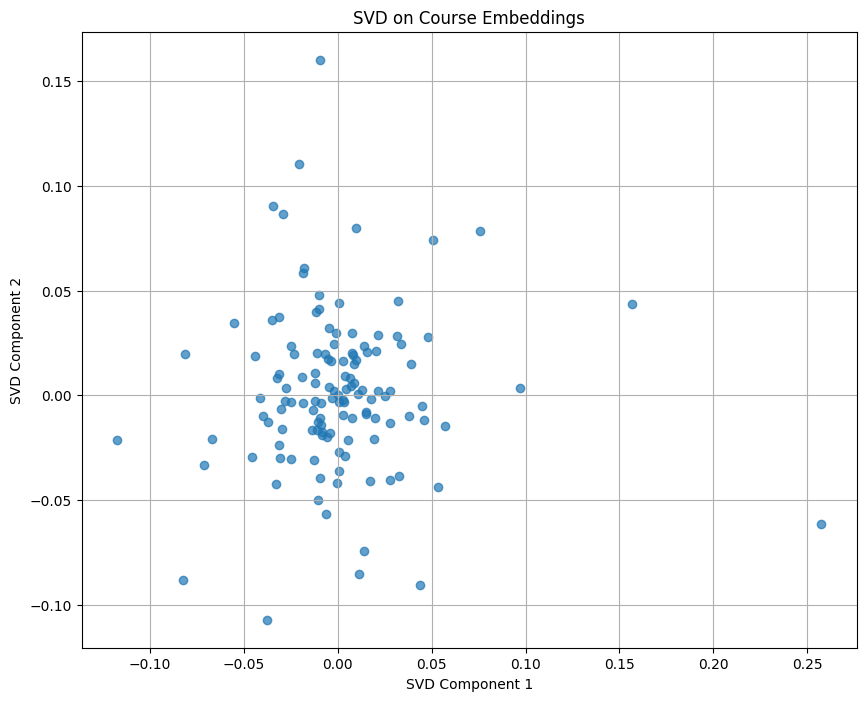

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Applying SVD on Course Embeddings
# Selecting the number of components for SVD
n_components = 2
svd = TruncatedSVD(n_components=n_components)

# Excluding the 'item' column which is not a feature
course_embeddings_svd = svd.fit_transform(course_embeddings_df.iloc[:, 1:])

# Visualizing the results of SVD
plt.figure(figsize=(10, 8))
plt.scatter(course_embeddings_svd[:, 0], course_embeddings_svd[:, 1], alpha=0.7)
plt.title('SVD on Course Embeddings')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.grid(True)
plt.show()

**5. MDS**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


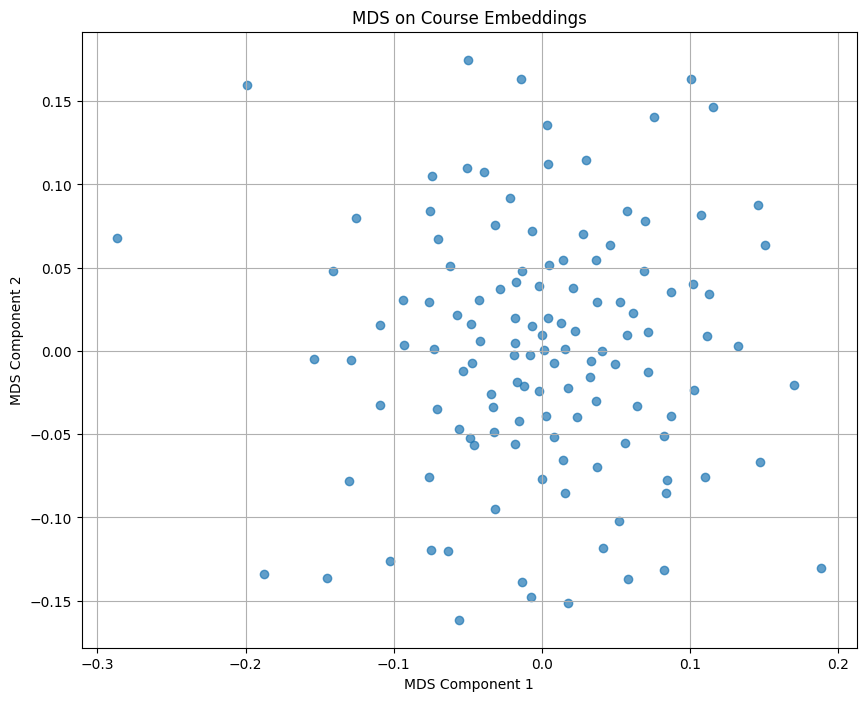

In [ ]:
from sklearn.manifold import MDS

# Applying MDS on Course Embeddings
# Selecting the number of components for MDS
n_components_mds = 2
mds = MDS(n_components=n_components_mds, random_state=0)

# Excluding the 'item' column which is not a feature
course_embeddings_mds = mds.fit_transform(course_embeddings_df.iloc[:, 1:])

# Visualizing the results of MDS
plt.figure(figsize=(10, 8))
plt.scatter(course_embeddings_mds[:, 0], course_embeddings_mds[:, 1], alpha=0.7)
plt.title('MDS on Course Embeddings')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.grid(True)
plt.show()

**6. ISOMap**

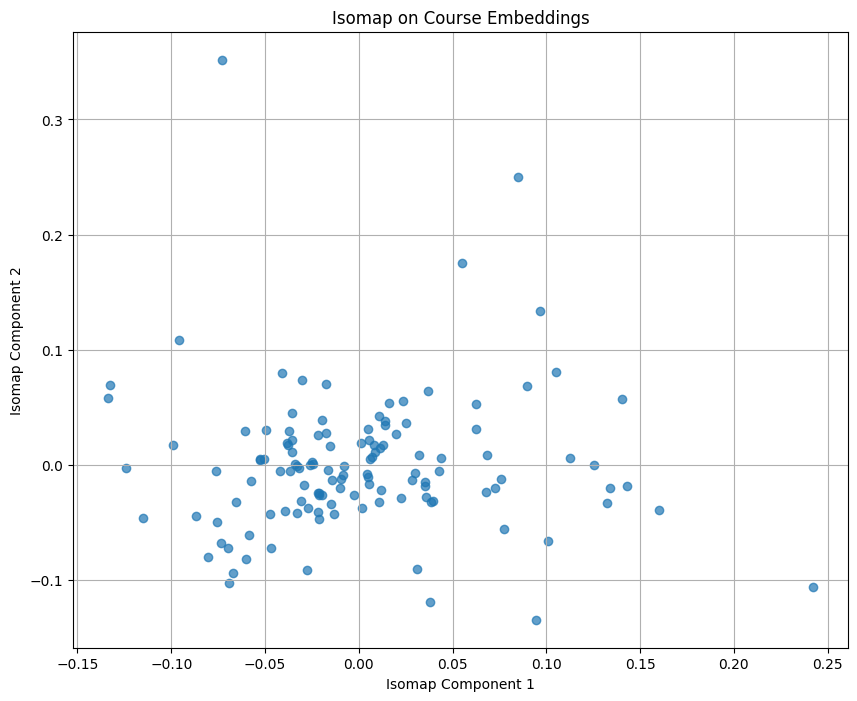

In [ ]:
from sklearn.manifold import Isomap


# Applying Isomap on Course Embeddings
# Selecting the number of components and neighbors for Isomap
n_components_isomap = 2
n_neighbors_isomap = 5  # Default value, can be adjusted based on dataset characteristics
isomap = Isomap(n_components=n_components_isomap, n_neighbors=n_neighbors_isomap)

# Excluding the 'item' column which is not a feature
course_embeddings_isomap = isomap.fit_transform(course_embeddings_df.iloc[:, 1:])

# Visualizing the results of Isomap
plt.figure(figsize=(10, 8))
plt.scatter(course_embeddings_isomap[:, 0], course_embeddings_isomap[:, 1], alpha=0.7)
plt.title('Isomap on Course Embeddings')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.grid(True)
plt.show()

**7. LLE**

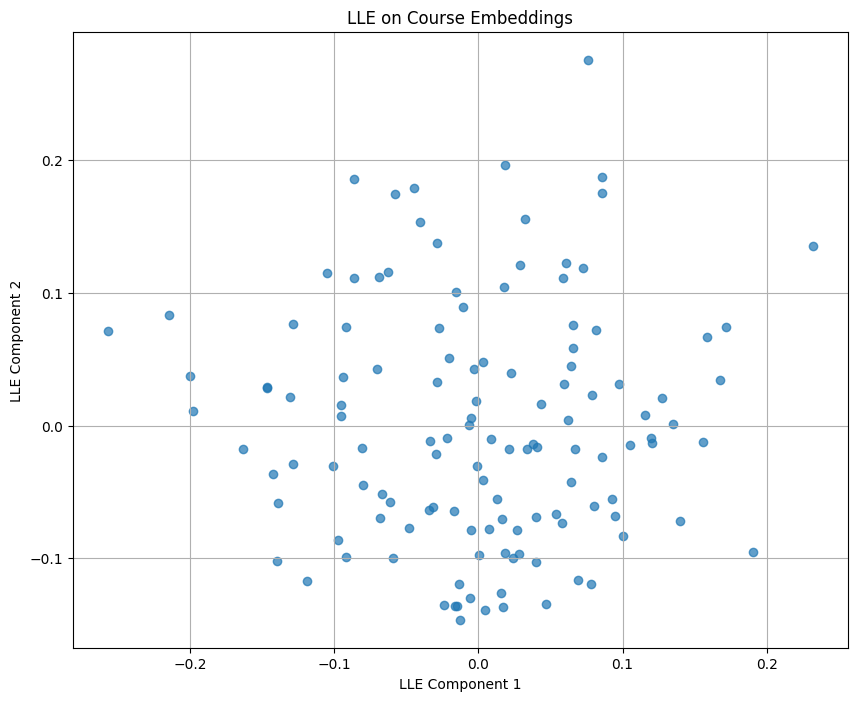

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
# Applying LLE on Course Embeddings
n_components_lle = 2
lle = LocallyLinearEmbedding(n_components=n_components_lle, n_neighbors=10, random_state=0)

# Excluding the 'item' column which is not a feature
course_embeddings_lle = lle.fit_transform(course_embeddings_df.iloc[:, 1:])

# Visualizing the results of LLE
plt.figure(figsize=(10, 8))
plt.scatter(course_embeddings_lle[:, 0], course_embeddings_lle[:, 1], alpha=0.7)
plt.title('LLE on Course Embeddings')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.grid(True)
plt.show()